# Testing SXS catalogue load

Objectives:

1. Test SXS simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [1]:
import sys


#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp'
#libpath = '/home/vaishakprasad/Documents/Codes/nrcattools-local-vp'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/Documents/Codes/config', '/home/vaishakprasad/Documents/Codes/waveformtools', '/home/vaishakprasad/Documents/Codes/qlmtools', '/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python310.zip', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp']


## Display the environment

In [2]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.11
nrcat                 *  /home/vaishakprasad/soft/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [3]:
import nrcatalogtools
import nrcatalogtools.lvc as lalutils
#from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax
#from nrcatalogtools.rit import RITCatalog
from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes
import sxs

import numpy as np
from nrcatalogtools.sxs import SXSCatalog
import matplotlib.pyplot as plt


import numpy as np
import waveformtools
import h5py


#####################
# matplotlib presets
#########################################

labelsize=16
labelpad=14

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"figure.figsize" : (8,6)})
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.labelpad" : labelpad})
plt.rcParams.update({"axes.labelsize" : labelsize})
plt.rcParams.update({"figure.autolayout" : True})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({'legend.markerscale': 12})

No version information file '.version' found


In [4]:
nrcatalogtools.__file__

'/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp/nrcatalogtools/__init__.py'

### SXS cat details

In [5]:
# View SXS cache
sxsdir = sxs.sxs_directory("cache")
sxsdir

PosixPath('/home/vaishakprasad/.cache/sxs')

In [6]:
# Simulation name
sim_name = 'SXS:BBH:0001'

# Parameters
M = 40
D = 1000
inc = np.pi/3
coa_phase = np.pi/4
delta_t = 1./(4*2048)

# Convention

hp1, hx1, h1... : nrcat waveforms

wfa1, hp2, hx2, ... : waveformtools waveforms

## Load waveform

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Downloading to /home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5:



In [7]:
sxs1 = SXSCatalog.load(download=False)

In [8]:
sxsw = sxs1.get(sim_name, extrapolation_order=2)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


<class 'sxs.waveforms.waveform_modes.WaveformModes'>


In [1]:
sxsw.filepath

NameError: name 'sxsw' is not defined

In [15]:
hpc = sxsw.get_td_waveform(total_mass=M, distance=D, inclination=inc,
                    coa_phase=coa_phase, delta_t=delta_t
                    )
hpc_pycbc = hpc # mwf.to_pycbc(hpc)
hp1, hx1 = hpc_pycbc.real(), hpc_pycbc.imag()

plt.plot(hp1.sample_times, hp1)
plt.plot(hx1.sample_times, hx1)
plt.grid()
plt.show()

AttributeError: 'WaveformModes' object has no attribute '_filepath'

In [14]:
help(sxs1.get)

Help on method get in module nrcatalogtools.sxs:

get(sim_name, extrapolation_order=2) method of nrcatalogtools.sxs.SXSCatalog instance



In [16]:
mdata = sxs1.get_metadata(sim_name)

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/metadata.json


In [17]:
mdata

Metadata([('simulation_name', 'd18.0_q1.0_s0_0_0_s0_0_0/Lev5'),
          ('alternative_names', 'SXS:BBH:0001'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 28.1190834141),
          ('reference_mass_ratio', 0.9999999899440033),
          ('reference_chi_eff', 1.2156391861217613e-07),
          ('reference_chi1_perp', 9.733308972643856e-10),
          ('reference_chi2_perp', 1.4299394525915949e-09),
          ('reference_eccentricity', 0.0002569),
          ('reference_dimensionless_spin1',
           [7.09752141352e-10, -6.66051760901e-10, 1.20930921804e-07]),
          ('reference_dimensionless_spin2',
           [5.84453420303e-10, 1.30504445113e-09, 1.22196915414e-07]),
          ('reference_orbital_frequency',
           [2.82808523611e-13, -8.25159171205e-13, 0.0122754056311]),
          ('reference_mass1', 0.500000161328),
          ('reference_mass2', 0.500000166356),
          ('reference_time', 320.0),
      

In [23]:
mdata['metadata_path']

'/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v6/Lev5/metadata.json'

## Compute LAL source frame from SXS metadata

In [25]:
try:
    from importlib import reload
    reload(nrcatalogtools.lvc)
except:
    pass

from nrcatalogtools.lvc import GetNRToLALRotationAnglesFromH5, ComputeLALSourceFrameFromSXSMetadata

ImportError: cannot import name 'GetNRToLALRotationAnglesFromH5' from 'nrcatalogtools.lvc' (/home/vaishakprasad/Documents/Codes/nrcattools-local/nrcatalogtools/lvc.py)

In [26]:
lsf = ComputeLALSourceFrameFromSXSMetadata(mdata)

NameError: name 'ComputeLALSourceFrameFromSXSMetadata' is not defined

In [16]:
lsf

{'LNhat': array([ 2.30386296e-11, -6.72205217e-11,  1.00000000e+00]),
 'nhat': array([7.20417657e-01, 6.93540481e-01, 3.00227175e-11])}

In [29]:
fdir = "/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/"
fname = 'rhOverM_Asymptotic_GeometricUnits_CoM.h5'
H5File = h5py.File(fdir + fname)

In [31]:
H5File.filename

'/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5'

In [30]:
angles = GetNRToLALRotationAnglesFromH5(H5File=H5File, \
                                        Metadata=mdata, \
                                        inclination=np.pi/6, \
                                        PhiRef=np.pi/3)
angles

{'theta': 0.5235987755400957,
 'psi': 1.2899907615046804,
 'alpha': 3.141592653589793,
 'TRef': 320.0,
 'FRef': None}

#### Check what happens at inclination = np.pi

In [32]:
theta = angles['theta']
phi = angles['psi']
alpha = angles['alpha']

In [33]:
# Parameters
M = 40
D = 1000
inc = 0
coa_phase = np.pi/4
delta_t = 1./(4*2048)

In [ ]:
w

In [ ]:
taxis, hp2, hx2 = wfa1.to_td_waveform(Mtotal=M, distance=D, incl_angle=inc, delta_t=delta_t)

In [35]:
td_wf = sxsw.evaluate([theta, phi, alpha])

In [40]:
td_wf

TimeSeries([-0.0004886 -0.00037785j, -0.00048803-0.00037476j,
       -0.00048742-0.00037169j, ..., -0.00011145+0.00015966j,
       -0.00011127+0.00015972j, -0.0001111 +0.00015977j], time=array([-108.26389706, -107.76389789, -107.26389873, ..., 9912.24770158,
       9912.34770192, 9912.44770226]), time_axis=0)

/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


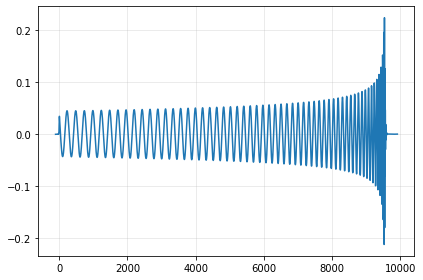

In [41]:
plt.plot(td_wf.time, np.array(td_wf))
plt.show()

In [42]:
help(sxsw)

Help on WaveformModes in module nrcatalogtools.waveform object:

class WaveformModes(sxs.waveforms.waveform_modes.WaveformModes)
 |  WaveformModes(data, time=None, time_axis=0, modes_axis=1, ell_min=2, ell_max=4, verbosity=0, **w_attributes) -> None
 |  
 |  Method resolution order:
 |      WaveformModes
 |      sxs.waveforms.waveform_modes.WaveformModes
 |      sxs.waveforms.waveform_mixin.WaveformMixin
 |      abc.ABC
 |      sxs.time_series.TimeSeries
 |      numpy.ndarray
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_mode(self, ell, em)
 |  
 |  get_polarizations(self, inclination, coa_phase)
 |      Sum over modes data and return plus and cross GW polarizations
 |      
 |      Args:
 |          inclination (float): Inclination angle between the line-of-sight
 |              orbital angular momentum vector [radians]
 |          coa_phase (float): Coalesence orbital phase [radians]
 |      
 |      Returns:
 |          Tuple(numpy.ndarray): Numpy Arrays contai

In [45]:
sxsw.

TypeError: getfield() missing required argument 'dtype' (pos 1)